In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from collections import Counter
import pandas as pd
from scipy.io import loadmat

In [19]:
m = loadmat("dato_taller.mat", squeeze_me=True, struct_as_record=False)
X_train = np.asarray(m["x_entena"], dtype=np.float32)
X_test  = np.asarray(m["x_prueba"],  dtype=np.float32)
y_train = np.asarray(m["y_entrena"]).reshape(-1).astype(np.int64)

In [20]:
df_train = pd.DataFrame(X_train)
df_train["y"] = y_train

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float32
 1   1       1000 non-null   float32
 2   2       1000 non-null   float32
 3   3       1000 non-null   float32
 4   4       1000 non-null   float32
 5   5       1000 non-null   float32
 6   6       1000 non-null   float32
 7   7       1000 non-null   float32
 8   8       1000 non-null   float32
 9   9       1000 non-null   float32
 10  10      1000 non-null   float32
 11  11      1000 non-null   float32
 12  12      1000 non-null   float32
 13  13      1000 non-null   float32
 14  14      1000 non-null   float32
 15  15      1000 non-null   float32
 16  16      1000 non-null   float32
 17  17      1000 non-null   float32
 18  18      1000 non-null   float32
 19  19      1000 non-null   float32
 20  y       1000 non-null   int64  
dtypes: float32(20), int64(1)
memory usage:

In [22]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.023801,1.089761,-3.789389,-0.721965,0.027162,0.755513,3.421769
1,1000.0,0.051353,1.080855,-3.275002,-0.655450,0.041898,0.784048,4.189188
2,1000.0,-0.016699,1.079677,-3.673204,-0.787843,0.010982,0.730634,3.115408
3,1000.0,0.020372,1.100977,-3.346933,-0.772707,0.001392,0.784678,3.513436
4,1000.0,0.027876,1.104239,-2.934976,-0.708734,0.021660,0.779033,4.258661
5,1000.0,0.040844,1.076074,-2.966682,-0.735771,0.065818,0.757994,3.112791
6,1000.0,0.020126,1.117848,-3.216156,-0.768629,-0.013546,0.790539,3.563128
7,1000.0,0.009970,1.112152,-3.225683,-0.749929,-0.018637,0.793928,3.234170
8,1000.0,0.001265,1.094216,-3.341144,-0.703068,0.007781,0.763059,3.809522
9,1000.0,-0.036803,1.067097,-3.857510,-0.742587,-0.007605,0.680511,3.245105


In [23]:
df_train["y"].value_counts()

y
 1    531
-1    469
Name: count, dtype: int64

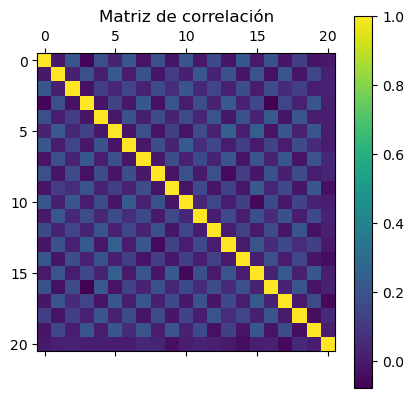

In [25]:
corr = df_train.corr(numeric_only=True)

plt.matshow(corr)
plt.title("Matriz de correlación")
plt.colorbar()
plt.show()

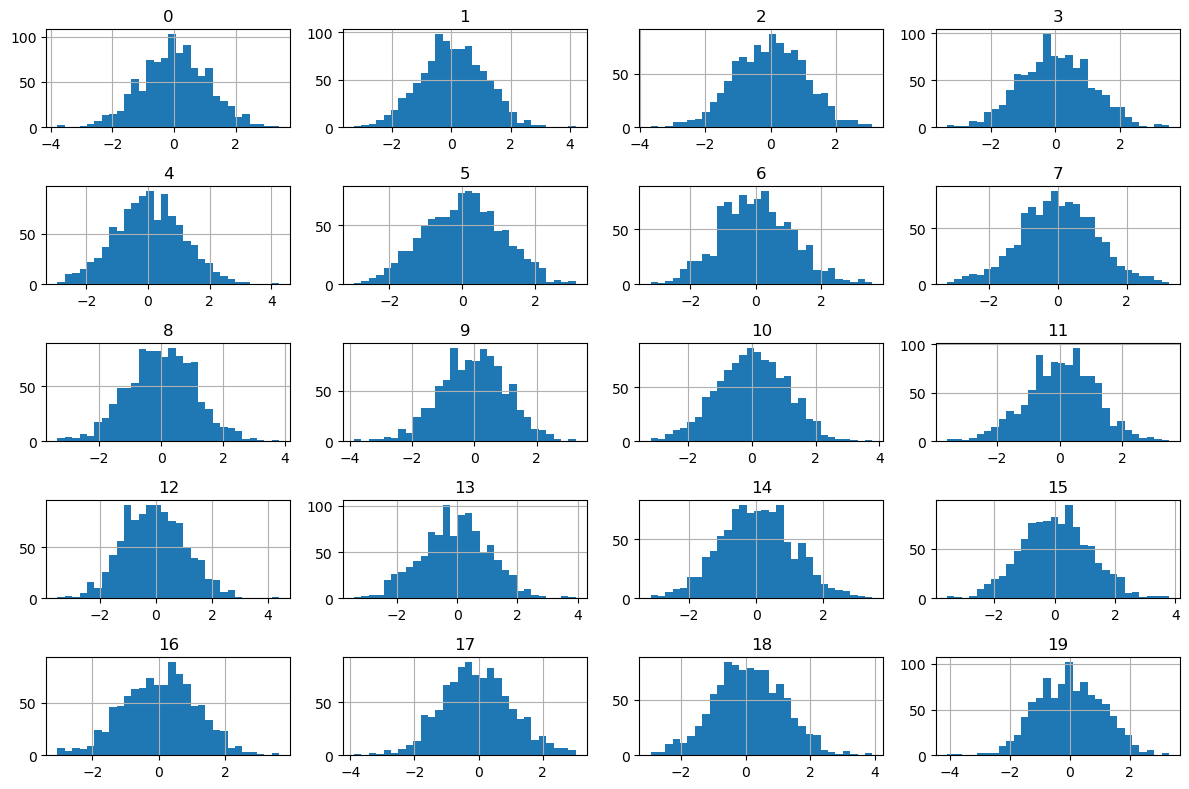

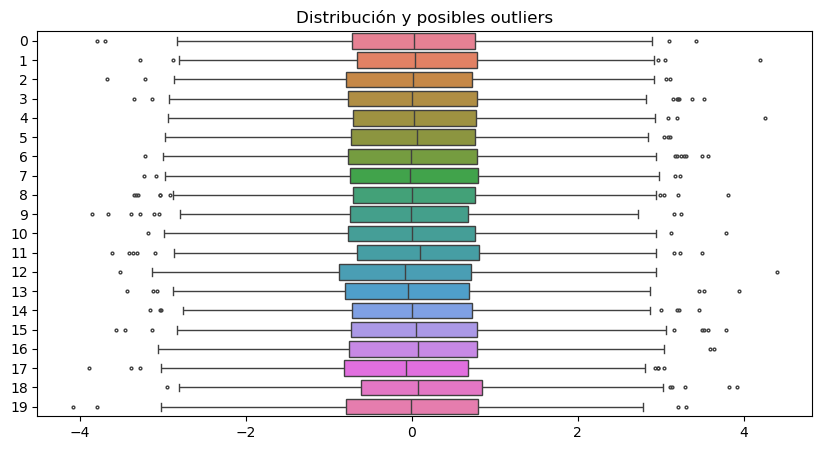

In [33]:
df_features = df_train.drop(columns="y")

# Histograma conjunto
df_features.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots globales
plt.figure(figsize=(10,5))
sns.boxplot(data=df_features, orient="h", fliersize=2)
plt.title("Distribución y posibles outliers")
plt.show()

In [37]:
#importantisimo normalizar datos!!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

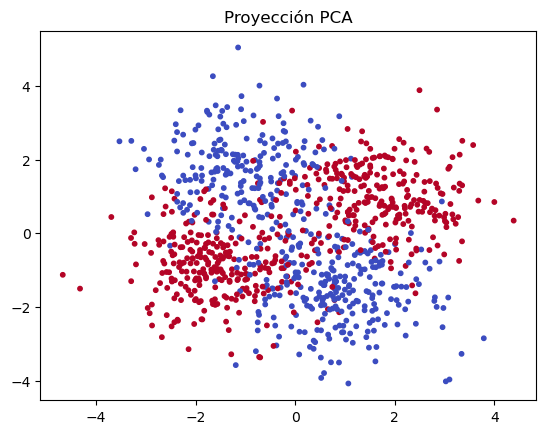

In [40]:
#Reducción de dimensionalidad, explicar porque se deben reducir caracteristicas (columnas del dataset)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap="coolwarm", s=10)
plt.title("Proyección PCA")
plt.show()

In [36]:
#sns.pairplot(df_train.sample(200), hue="y", diag_kind="kde", plot_kws={'s':10})
#plt.show()

In [41]:
#considerar eliminacion de outliers? 
